In [2]:
import pandas as pd
import numpy as np
import requests
import json
from pymongo import MongoClient
from math import radians, cos, sin, asin, sqrt

mac = [[126.9573779, 37.5048875] , [127.057799, 37.5781547] , [127.0403004, 37.5237111] , [127.1450999, 37.535504] 
       , [126.890246, 37.5070488] , [126.8837403, 37.4813743] , [126.9247425, 37.5799351] , [126.9219911, 37.5550516] , 
       [126.9971186, 37.4816832] , [126.9167249, 37.610645] , [126.9896979, 37.5337918] , [127.0827868, 37.5114403] , 
       [126.9568983, 37.4951199] , [126.8863946, 37.4786447] , [126.9795003, 37.5668114] , [127.093618, 37.5964905] ,
       [127.099686, 37.5150646] , [127.0219151, 37.5174591] , [127.0551845, 37.4973625] , [127.0354138, 37.4824463] ,
       [126.9522376, 37.4805756] , [126.9814064, 37.4749964] , [127.0396022, 37.4780974] , [127.0947354, 37.6064619] , 
       [126.862982, 37.5155177] , [126.8810367, 37.5371922] , [127.0336221, 37.5621814] , [126.9846356, 37.5605759] , 
       [126.8935069, 37.5310483] , [127.0217344, 37.6181296] , [126.8949784, 37.4852224] , [127.0620773, 37.6483302] , 
       [127.0413425, 37.5162698] , [127.06186, 37.4923541] , [126.9717326, 37.5548376] , [127.1226206, 37.5303395] , 
       [127.0162122, 37.4940404] , [127.0380777, 37.4975843] , [127.0450344, 37.5802009] , [127.0306262, 37.4901922] ,
       [126.8884274, 37.5083236] , [126.9805464, 37.4844639] , [126.8824261, 37.5013912] , [127.007025, 37.5103488] , 
       [126.930196, 37.4819652] , [127.0020996, 37.5829073] , [127.0269961, 37.5003928] , [126.9194208, 37.6272909] ,
       [126.8810069, 37.4802295] , [127.0619147, 37.5958872] , [127.0452573, 37.6211527] , [127.0588074, 37.5083321] , 
       [126.9904813, 37.5706077] , [126.8373406, 37.5450958] , [126.8715672, 37.5476522] , [126.9097173, 37.5560628] , [127.0419382, 37.5572348] , [126.9026344, 37.4505344] , [127.076168, 37.6297532] , [126.9367251, 37.5585928] , [127.0726628, 37.5725354] , [127.0526858, 37.5924181] , [126.9371633, 37.55569] , [127.0288796, 37.5246] , [127.0097246, 37.4862395] , [127.0305413, 37.5135684] , [127.0470548, 37.5035413] , [127.0174822, 37.5924715] , [127.1308152, 37.4949003] , [127.1753478, 37.5498037] , [126.9016607, 37.5344674] , [127.0561803, 37.6724331] , [127.0261498, 37.6380281] , [126.9429035, 37.5902797] , [126.8635145, 37.4972395] , [127.0535218, 37.5399353] , [126.9248643, 37.5251815] , [127.0791634, 37.6017866] , [127.1279245, 37.5503956] , [126.8308779, 37.5314234] , [127.0075428, 37.5894108] , [127.0262046, 37.626957] , [126.9205342, 37.6008414] , [126.8387402, 37.5197288] , [126.98422, 37.5725944] , [126.8097048, 37.5617466] , [127.0292764, 37.5844107] , [127.0845, 37.5364389] , [127.0731466, 37.5473126] , [126.907662, 37.5169943] , [126.9472047, 37.5412253] , [127.0769886, 37.5043489] , [127.0287553, 37.4986859] , [126.9530766, 37.5474066] , [126.943535, 37.5134312] , [127.1430033, 37.5472637] , [126.9846809, 37.564227] , [126.9988817, 37.5834143] , [127.075488, 37.5934898] , [126.9843663, 37.5763158] , [127.0304103, 37.6133166] , [127.1251713, 37.5387396] , [127.0433298, 37.6701632] , [126.8637755, 37.5281307] , [126.9200103, 37.5003258] , [127.13728, 37.5293384] , [126.9133017, 37.5491657] , [127.0689352, 37.6366485] , [127.10915, 37.5060079] , [127.0609054, 37.5102604] , [127.0372221, 37.6536447] , [127.0760144, 37.6508538] ,
       [126.9192624, 37.6176506] , [126.8597671, 37.5582961] , [127.0360251, 37.59578] , [126.9700799, 37.5685872]]
class Df_converter(object):
    
  
    def __init__(self):
        mongo = MongoClient('ec2-54-149-149-184.us-west-2.compute.amazonaws.com', 27017)
        database = mongo.dabang.room_db2
        df = pd.DataFrame(list(database.find()))
        df['aircondition'] = pd.Series( 1 if 0 in i   else 0 for i in df.room_options  )
        df['laundry'] = pd.Series( 1 if 1 in i   else 0 for i in df.room_options  )
        df['bed'] = pd.Series( 1 if 2 in i   else 0 for i in df.room_options  )
        df['desk'] = pd.Series( 1 if 3 in i   else 0 for i in df.room_options  )
        df['closet'] = pd.Series( 1 if 4 in i   else 0 for i in df.room_options  )
        df['tv'] = pd.Series( 1 if 5 in i   else 0 for i in df.room_options  )
        df['shoes'] = pd.Series( 1 if 6 in i   else 0 for i in df.room_options  )
        df['refrigerator'] = pd.Series( 1 if 7 in i   else 0 for i in df.room_options  )
        df['gas'] = pd.Series( 1 if 8 in i   else 0 for i in df.room_options  )
        df['induction'] = pd.Series( 1 if 9 in i   else 0 for i in df.room_options  )
        df['microwave'] = pd.Series( 1 if 10 in i   else 0 for i in df.room_options  )
        df['doar_lock'] = pd.Series( 1 if 11 in i   else 0 for i in df.room_options  )
        df['biddet'] = pd.Series( 1 if 12 in i   else 0 for i in df.room_options  )
        df = df[(df.room_type!=u'아파트') & (df.room_type!=u'쓰리룸')]
        df = df[df.address!=u'경기도 부천시 소사구 괴안동']
        df = df[df.price<60000] # EDA 이후 추가한 부분
        df = df[df.room_size<100] #EDA이후 추가한 부분
        df = df.drop_duplicates('id')
        df = df.drop('_id',1)
        self.df = df
        self.loc=np.asarray(df['loc']).reshape(-1,1)
     
    
    def location_point(self,lst):
        loc_list = []
        for depart in lst: 
            print 'wow'
            try:
                naverurl =  'https://openapi.naver.com/v1/map/geocode?encoding=utf-8&coord=latlng&output=json&query={}'.format(depart)
                headers = {}
                headers['X-Naver-Client-Id'] =  'fMc7n_JcnZoItjRY0HHp'
                headers['X-Naver-Client-Secret'] = 'agQGiCxnNF'
                res = requests.get(naverurl, headers = headers)
                jsonf = json.loads(res.content)
                loc_list.append([float(jsonf['result']['items'][0]['point']['x']),float(jsonf['result']['items'][0]['point']['y']) ])
            except: 
                continue
        return loc_list
        
    def d_to_places(self,loc_lst):
        
        def dist_places(x):
            z = []
            for i in range(len(loc_lst)):
                lon1, lat1, lon2, lat2 = map(radians, [x[0][0], x[0][1], loc_lst[i][0], loc_lst[i][1]])
                dlon = lon2 - lon1 
                dlat = lat2 - lat1 
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * asin(sqrt(a)) 
                km = 6367 * c
                z.append(km)
            return min(z)
        return np.apply_along_axis(dist_places,1,self.loc)

    def d_to_park(self):
        
        park = [[126.8141241,37.5876169], [126.8979808,37.5397924], [126.9939698,37.5102684], [127.0165227,37.5272945], [127.081523,37.5179568]
                 ,[127.1194287,37.5499881],[126.8721985,37.5649224],  [126.8986955,37.555875], [126.9736383,37.5159618], [127.0691564,37.5291008]]

        def dist_park(x):
            z = []
            for i in range(len(park)):
                lon1, lat1, lon2, lat2 = map(radians, [x[0][0], x[0][1], park[i][0], park[i][1]])
                dlon = lon2 - lon1 
                dlat = lat2 - lat1 
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * asin(sqrt(a)) 
                km = 6367 * c
                z.append(km)
            return min(z)
        return np.apply_along_axis(dist_park,1,self.loc)
        
  

    def d_to_myoungdong(self):
        def dist_myongdong(x):
            lon1, lat1, lon2, lat2 = map(radians, [x[0][0], x[0][1],126.9653337,37.5634056])
            dlon = lon2 - lon1 
            dlat = lat2 - lat1 
            a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
            c = 2 * asin(sqrt(a)) 
            km = 6367 * c
            return km
        return np.apply_along_axis(dist_myongdong,1,self.loc)
    
    
    def d_to_gangnam(self):    
        def dist_gangnam(x):
            lon1, lat1, lon2, lat2 = map(radians, [x[0][0], x[0][1],127.0083444,37.5002943])
            dlon = lon2 - lon1 
            dlat = lat2 - lat1 
            a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
            c = 2 * asin(sqrt(a)) 
            km = 6367 * c
            return km
        return np.apply_along_axis(dist_gangnam,1,self.loc)
    def d_to_starbucks(self):
        mongo = MongoClient('ec2-54-149-149-184.us-west-2.compute.amazonaws.com', 27017)
        starbucksloc = mongo.dabnag.star_json
        starloc = starbucksloc.aggregate([{'$group':{'_id':'$json.result.items'}},{'$group':{'_id':'$_id.point'}}])
        starlst =[]
        for i in starloc:
            try:
                starlst.append([i['_id'][0]['x'],i['_id'][0]['y']])
            except:
                continue
        return self.d_to_places(starlst)
test_df = Df_converter()
df = test_df.df
fancy_places = test_df.location_point(['서울특별시 중구 남대문로 81','서울특별시 송파구 올림픽로 300','서울특별시 강남구 압구정로 343'])
df['d_to_fancy'] = test_df.d_to_places(fancy_places)
df['park'] = test_df.d_to_park()
df['distance_gn'] = test_df.d_to_gangnam()
df['distance_md']= test_df.d_to_myoungdong()
df['d_to_mac'] = test_df.d_to_places(mac)
df['star_bucks'] = test_df.d_to_starbucks()
df = df[df.distance_gn<200] #EDA이후 추가한 부분
df = df[df.star_bucks<15] #EDA 이후 추가한 부분 
df = df.reset_index()

wow
wow
wow


In [3]:
population = pd.read_csv('population.csv',encoding = 'euc-kr')
population['population'] = [ int(''.join(i.split(','))) for i in population['population']]
population['elder'] = [ int(''.join(i.split(','))) for i in population['elder']]

popdict = {}
elderdict ={}
for i in range(len(population)):
    address= u'서울특별시'+' '+ population.ix[i,:]['district'] + ' ' + population.ix[i,:]['dong']
    popdict[address ] = population.ix[i,:]['population']
    elderdict[address]= population.ix[i,:]['elder']
def seriesfind(s, el):
    for i in s.index:
        if s[i] == el: 
            return i
    return None
import re
datas = set(df['address']) - set(popdict.keys())
for i in datas:
    lst =  re.findall('(.+)\d',i)
    try:
        addr = lst[0]
    except:
        continue
    if addr in popdict.keys():
        idx = seriesfind(df['address'],addr)
        df['address'][idx] = addr
pop_mean = {}
elder_mean = {}
popmeandf = population.groupby(['district']).mean()
population_address = []
elder_address =[]
j = 0
for i in df['address']:
    j = j + 1
    if j==len(df['address']):
        break
    try:
        population_address.append(popdict[i])
        elder_address.append(elderdict[i])
    except:
        districtlst = i.split()
        population_address.append(popmeandf.loc[districtlst[1]]['population'])
        elder_address.append(popmeandf.loc[districtlst[1]]['elder'])
    
df['population'] = population_address
df['elder'] = elder_address
df['elder_ratio'] = np.asarray(df['elder'])/np.asarray(df['population'])

c:\python27\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
bank = pd.read_csv('bank.csv',encoding = 'euc-kr')
bank['totalbanks'] = [ int(i) for i in bank['totalbanks']]

bankdict = {}
def change_add(df,key,emptydict):
    for i in range(len(df)):
        address= u'서울특별시'+' '+ df.ix[i,:]['district'] + ' ' + df.ix[i,:]['dong']
        emptydict[address ] = df.ix[i,:][key]
    return emptydict
bankdict = change_add(bank,'totalbanks',{})
import re
datas = set(df['address']) - set(bankdict.keys())
for i in datas:
    lst =  re.findall('(.+)\d',i)
    try:
        addr = lst[0]
    except:
        continue
    if addr in bankdict.keys():
        idx = seriesfind(df['address'],addr)
        df['address'][idx] = addr
bankmeandf = bank.groupby(['district']).mean()
totalbanks = []
j = 0
for i in df['address']:
    j = j + 1
    if j > len(df) :
        break
    try:
        totalbanks.append(bankdict[i])
    except:
        districtlst = i.split()
        totalbanks.append(bankmeandf.loc[districtlst[1]]['totalbanks'])
df['totalbanks'] = totalbanks
df['bank_ratio'] = np.asarray(df['totalbanks'])/np.asarray(df['population'])

c:\python27\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
df.to_csv('added_final.csv',encoding='utf-8')

In [1]:
import pandas as pd
df = pd.read_csv('./added_final.csv')
df['room_type'] = pd.Series(df.room_type,dtype = 'category')

In [2]:
from sklearn.cross_validation import train_test_split
train_df, test_df = train_test_split(df,test_size=0.25,random_state=0)



In [3]:
train_features = train_df[
    [u'd_to_fancy', u'distance_gn', u'shoes', u'metro_count', u'microwave', u'parking', u'd_to_conv', 'room_floor', u'building_floor',
     u'd_to_bank', 'totalbanks', u'closet', u'tv', 'elder_ratio', u'distance_md', u'doar_lock', u'elevator', u'animal', u'star_bucks', 
     u'induction', u'laundry', u'room_size', u'park', u'gas', u'd_to_mac', u'desk', u'd_to_metro',
     u'refrigerator', u'd_to_coffe', u'bed', u'aircondition', u'biddet', u'room_type']]
test_features = test_df[ [u'd_to_fancy', u'distance_gn', u'shoes', u'metro_count', u'microwave', u'parking', u'd_to_conv', 'room_floor', u'building_floor',
     u'd_to_bank', 'totalbanks', u'closet', u'tv', 'elder_ratio', u'distance_md', u'doar_lock', u'elevator', u'animal', u'star_bucks', 
     u'induction', u'laundry', u'room_size', u'park', u'gas', u'd_to_mac', u'desk', u'd_to_metro',
     u'refrigerator', u'd_to_coffe', u'bed', u'aircondition', u'biddet', u'room_type']]
train_price = train_df['price']
test_price = test_df['price']

In [10]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestRegressor
forest = RandomForestRegressor(n_estimators=250, random_state=0)

float_datawithprice = train_df[[  u'building_floor', u'd_to_bank', u'd_to_coffe', u'd_to_conv',
       u'd_to_metro',u'metro_count', 'room_floor', u'room_size' ,u'd_to_fancy', u'park', u'distance_gn', u'distance_md', u'd_to_mac', 
        u'star_bucks',
        u'elder_ratio', u'totalbanks','price']].dropna()
float_dataprice = float_datawithprice['price']
float_features = float_datawithprice.drop('price',axis =1)
forest.fit(float_features, np.log(float_dataprice))

importances = forest.feature_importances_

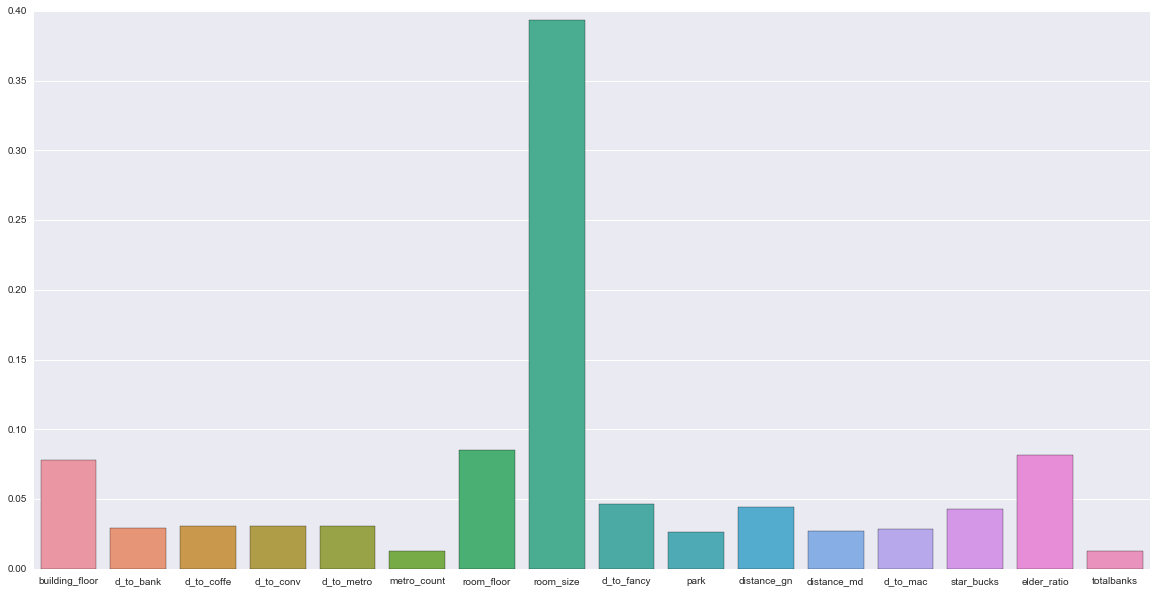

In [18]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(20,10))
sns.barplot(float_features.columns, importances)
plt.show()

In [20]:
import statsmodels.api as sm
sm.OLS.from_formula('''np.log(price)~scale(room_size)+scale(elder_ratio)+d_to_fancy+scale(building_floor)+scale(room_floor)+C(room_type)+scale(star_bucks)+induction+scale(distance_gn)+park+animal''',train_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     508.1
Date:                Fri, 28 Oct 2016   Prob (F-statistic):               0.00
Time:                        10:27:19   Log-Likelihood:                -860.49
No. Observations:                5106   AIC:                             1749.
Df Residuals:                    5092   BIC:                             1841.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        8.9775      0.019    466.218      0.000         8.940     9.015
C(room_type)[T.오피스텔]    -0.0997      0.025     -4.011      0.000        -0.148    -0.051
C(room_type)[T.원룸]          -0.1029      0.016     -6.553      0.000        -0.134    -0.072
C(room_type)[T.투룸]           0.1782      0.019      9.523      0.000         0.141     0.215
animal[T.True]                  -0.0616      0.014     -4.522      0.000        -0.088    -0.035
scale(room_size)                 0.1847      0.007     27.304      0.000         0.171     0.198
scale(elder_ratio)               0.0195      0.005      3.684      0.000         0.009     0.030
d_to_fancy                      -0.0231      0.002    -13.629      0.000        -0.026    -0.020
scale(building_floor)            0.0495      0.007      7.145      0.000         0.036     0.063
scale(room_floor)                0.0866      0.006     14.060      0.000         0.075     0.099
scale(star_bucks)               -0.0601      0.005    -11.413      0.000        -0.070    -0.050
induction                        0.1497      0.010     15.759      0.000         0.131     0.168
scale(distance_gn)               0.0276      0.005      5.700      0.000         0.018     0.037
park                            -0.0212      0.002     -8.594      0.000        -0.026    -0.016
==============================================================================
Omnibus:                      143.261   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.283
Skew:                           0.232   Prob(JB):                     1.00e-55
Kurtosis:                       3.988   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

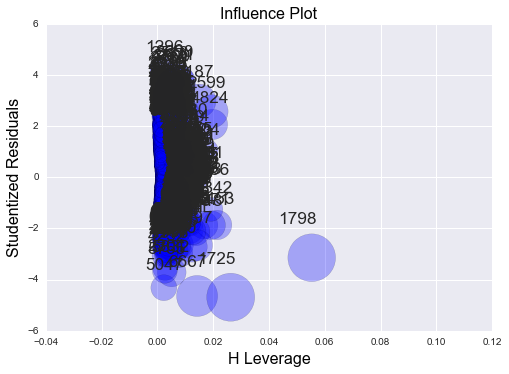

In [21]:
model = sm.OLS.from_formula('''np.log(price)~scale(room_size)+scale(elder_ratio)+d_to_fancy+scale(building_floor)+scale(room_floor)+C(room_type)+scale(star_bucks)+induction+scale(distance_gn)+induction+park+animal''',train_df).fit()
sm.graphics.influence_plot(model, plot_alpha=0.3)
plt.show()


In [22]:
train_df = train_df.drop(train_df.index[[1798,1725]])

In [23]:
train_features = train_df[
    [u'd_to_fancy', u'distance_gn', u'shoes', u'metro_count', u'microwave', u'parking', u'd_to_conv', 'room_floor', u'building_floor',
     u'd_to_bank', 'totalbanks', u'closet', u'tv', 'elder_ratio', u'distance_md', u'doar_lock', u'elevator', u'animal', u'star_bucks', 
     u'induction', u'laundry', u'room_size', u'park', u'gas', u'd_to_mac', u'desk', u'd_to_metro',
     u'refrigerator', u'd_to_coffe', u'bed', u'aircondition', u'biddet', u'room_type']]
test_features = test_df[ [u'd_to_fancy', u'distance_gn', u'shoes', u'metro_count', u'microwave', u'parking', u'd_to_conv', 'room_floor', u'building_floor',
     u'd_to_bank', 'totalbanks', u'closet', u'tv', 'elder_ratio', u'distance_md', u'doar_lock', u'elevator', u'animal', u'star_bucks', 
     u'induction', u'laundry', u'room_size', u'park', u'gas', u'd_to_mac', u'desk', u'd_to_metro',
     u'refrigerator', u'd_to_coffe', u'bed', u'aircondition', u'biddet', u'room_type']]
train_price = train_df['price']
test_price = test_df['price']

In [24]:
sm.OLS.from_formula('''np.log(price)~scale(room_size)+scale(elder_ratio)+d_to_fancy+scale(building_floor)+scale(room_floor)+C(room_type)+scale(star_bucks)+induction+scale(distance_gn)+park+animal''',train_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     507.8
Date:                Fri, 28 Oct 2016   Prob (F-statistic):               0.00
Time:                        10:30:12   Log-Likelihood:                -861.08
No. Observations:                5104   AIC:                             1750.
Df Residuals:                    5090   BIC:                             1842.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        8.9776      0.019    466.078      0.000         8.940     9.015
C(room_type)[T.오피스텔]    -0.0998      0.025     -4.014      0.000        -0.148    -0.051
C(room_type)[T.원룸]          -0.1029      0.016     -6.555      0.000        -0.134    -0.072
C(room_type)[T.투룸]           0.1782      0.019      9.524      0.000         0.142     0.215
animal[T.True]                  -0.0616      0.014     -4.520      0.000        -0.088    -0.035
scale(room_size)                 0.1847      0.007     27.284      0.000         0.171     0.198
scale(elder_ratio)               0.0195      0.005      3.687      0.000         0.009     0.030
d_to_fancy                      -0.0231      0.002    -13.626      0.000        -0.026    -0.020
scale(building_floor)            0.0496      0.007      7.149      0.000         0.036     0.063
scale(room_floor)                0.0866      0.006     14.054      0.000         0.075     0.099
scale(star_bucks)               -0.0600      0.005    -11.381      0.000        -0.070    -0.050
induction                        0.1497      0.010     15.750      0.000         0.131     0.168
scale(distance_gn)               0.0276      0.005      5.693      0.000         0.018     0.037
park                            -0.0212      0.002     -8.598      0.000        -0.026    -0.016
==============================================================================
Omnibus:                      142.976   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.507
Skew:                           0.232   Prob(JB):                     1.47e-55
Kurtosis:                       3.986   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline,make_union
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelBinarizer,StandardScaler,LabelEncoder,RobustScaler,OneHotEncoder,Imputer,PolynomialFeatures,MinMaxScaler
class str_extractor(object):
    def __init__(self):
        pass
    def transform(self,df):
        lst = ['room_type']
        le = LabelEncoder()
        data = np.asarray(le.fit_transform(df[lst])).reshape(-1,1)
        return data
    
    def fit(self,df,y = None):
        return self
class binary_extractor(object):
    
    def __init__(self):
        pass
    
    def transform(self,df):
        boollst=[]
       
       
        lst = [ 'induction']
        return df[lst]
    
    def fit(self,df,y = None):
        return self
class float_extractor(object):
    
    def __init__(self):
        pass
    
    def transform(self,df):
        lst = ['room_size','park','elder_ratio','d_to_fancy','building_floor','room_floor','star_bucks','distance_gn','park' ]
        return df[lst]
    def fit(self,df,y = None):
        return self    
class bool_extractor(object):
    
    def __init__(self):
        pass
    
    def transform(self,df):
        lst=['animal']

        return df[lst]
    
    def fit(self,df,y = None):
        return self
class DenseTransformer(object):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self
lb = LabelBinarizer()    
pf = PolynomialFeatures(2)
le = LabelEncoder()
ohe = OneHotEncoder()
sc  = StandardScaler()
rs = RobustScaler()
mms = MinMaxScaler()
dt = DenseTransformer()


cross_score =[]
pl1 = make_pipeline(float_extractor(),imp,sc)
pl2 = make_pipeline(binary_extractor())
pl3 = make_pipeline(bool_extractor(),lb)
pl4 = make_pipeline(str_extractor(),OneHotEncoder(),dt)
pl5 = make_union(pl1,pl2,pl3,pl4)
pca_features = pl5.fit_transform(train_features)
model = Lasso(alpha = 0.0001)
crossscore =-np.mean(cross_val_score(model,pca_features,np.log(train_price),'r2',cv=5))
crossscore


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.56085191607922091

In [29]:
model = Lasso(alpha = 0.0001).fit(pca_features,np.log(train_price))
prediction = model.predict(pl5.transform(test_features))
np.mean((prediction-np.log(test_price))**2)


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.082663274268065565

In [30]:
model.score(pl5.transform(test_features),np.log(test_price))


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.55058645746279855

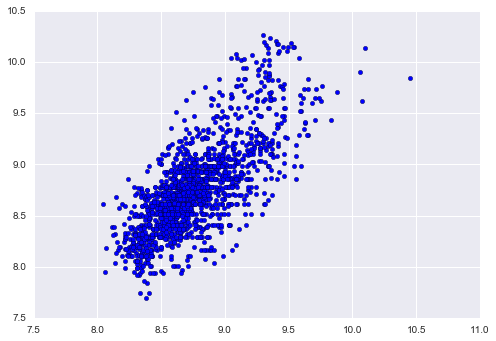

In [31]:
plt.scatter(prediction,np.log(test_price))
plt.show()

In [566]:
index10features = pl5.transform(test_df.ix[1222:1223,:])
np.exp(model.predict(index10features)[0])


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6408.9820683052558

In [41]:
from sklearn.decomposition import PCA,KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline      import FeatureUnion
from sklearn.preprocessing import RobustScaler
from sklearn  import metrics 
from sklearn.ensemble import ExtraTreesClassifier

#from sklearn.preprocessing import ColumnExtractor
class Price_extractor(object):
    def __init__(self):
        pass
   
    
    def transform(self,df):
        for i in df: 
            if i =='price':
                return df.price.reshape(-1,1)
    
    def fit(self,df,y = None):
        return self
class str_extractor(object):
    def __init__(self):
        pass
    def transform(self,df):
        lst = ['room_type']
        le = LabelEncoder()
        data = np.asarray(le.fit_transform(df[lst])).reshape(-1,1)
        return data
    
    def fit(self,df,y = None):
        return self
class float_extractor(object):
    
    def __init__(self):
        pass
    
    def transform(self,df):
        lst = [  u'building_floor', u'd_to_bank', u'd_to_coffe', u'd_to_conv',
       u'd_to_metro',u'metro_count', 'room_floor', u'room_size' ,u'd_to_fancy', u'park', u'distance_gn', u'distance_md', u'd_to_mac', 
        u'star_bucks',
        u'elder_ratio', u'totalbanks']
        

        return df[lst]
    
    def fit(self,df,y = None):
        return self
class binary_extractor(object):
    
    def __init__(self):
        pass
    
    def transform(self,df):
        boollst=[]
       
       
        lst = [ 'desk','closet','tv','shoes','refrigerator','gas','induction','microwave','doar_lock','biddet']
        return df[lst]
    
    def fit(self,df,y = None):
        return self
class bool_extractor(object):
    
    def __init__(self):
        pass
    
    def transform(self,df):
        lst=['animal','elevator']

        return df[lst]
    
    def fit(self,df,y = None):
        return self

class DenseTransformer(object):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self
class MultiColumnLabelEncoder(object):
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
lb = LabelBinarizer()    
pf = PolynomialFeatures(2)
le = LabelEncoder()
ohe = OneHotEncoder()
model = LogisticRegression()
sc  = StandardScaler()
rs = RobustScaler()
mms = MinMaxScaler()
dt = DenseTransformer()
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline,make_union
cross_score =[]
pl1 = make_pipeline(float_extractor(),imp,sc,pf,PCA(30))
pl2 = make_pipeline(binary_extractor())
pl3 = make_pipeline(bool_extractor(),lb)
pl4 = make_pipeline(str_extractor(),OneHotEncoder(),dt)
pl5 = make_union(pl1,pl2,pl3,pl4)
pca_features = pl5.fit_transform(train_features)
model = LinearRegression()
crossscore =-np.mean(cross_val_score(model,pca_features,np.log(train_price),'r2',cv=5))
print crossscore


-0.536787824173


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
model = model.fit(pca_features,np.log(train_price))
testfeatures = pl5.fit_transform(test_features)


c:\python27\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
np.mean((model.predict(testfeatures) - np.log(test_price))**2)

0.17630648929828843

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
float_datawithprice = train_df[[  u'building_floor', u'd_to_bank', u'd_to_coffe', u'd_to_conv',
       u'd_to_metro',u'metro_count', 'room_floor', u'room_size' ,u'd_to_fancy', u'park', u'distance_gn', u'distance_md', u'd_to_mac', 
        u'star_bucks',
        u'elder_ratio', u'totalbanks','price']]
imp = Imputer()
clusteringf =imp.fit_transform(float_datawithprice)


In [20]:
train_df['clusternumber'] = model.predict(clusteringf)

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
grouped = train_df[['address','room_type','building_floor','clusternumber','price']].groupby('clusternumber')
grouped.get_group(1)

,address,room_type,building_floor,clusternumber,price
4744,서울특별시 마포구 동교동,원룸,4,1,12300.0
402,서울특별시 용산구 원효로1가,투룸,5,1,12300.0
1341,서울특별시 광진구 화양동,투룸,2,1,11000.0
2602,서울특별시 중구 장충동2가,1.5룸,3,1,11500.0
6342,서울특별시 광진구 자양동,오피스텔,16,1,11350.0
2460,서울특별시 서대문구 미근동,1.5룸,10,1,10500.0
352,서울특별시 동대문구 휘경동,투룸,3,1,13000.0
2653,서울특별시 중구 묵정동,원룸,5,1,11500.0
3735,서울특별시 서대문구 대현동,원룸,10,1,10710.0
3656,서울특별시 관악구 신림동,투룸,6,1,10700.0


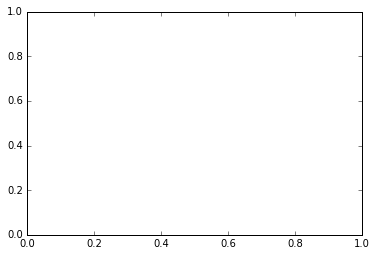

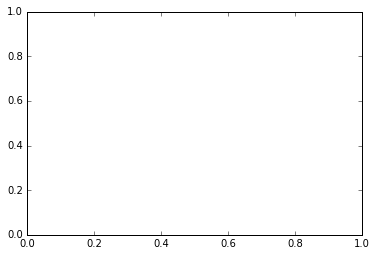

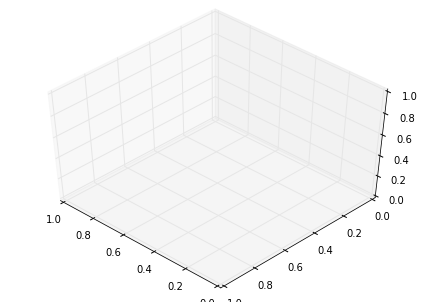

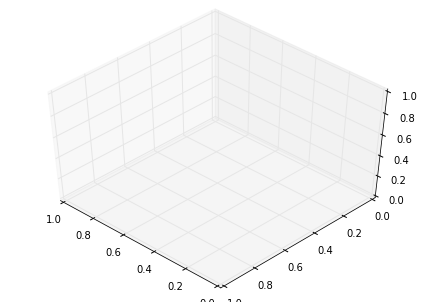

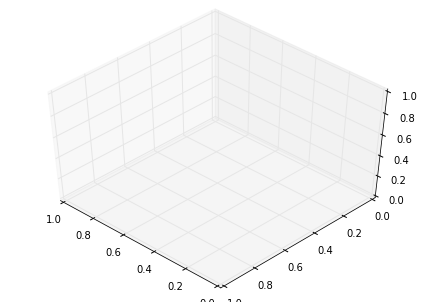

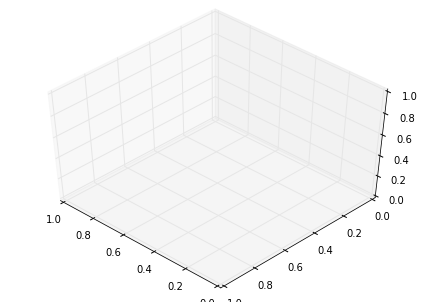

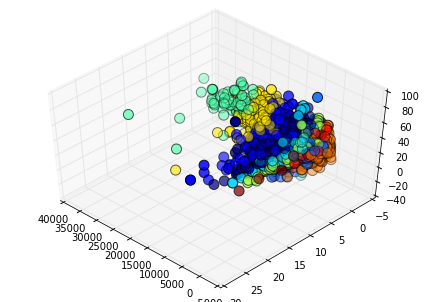

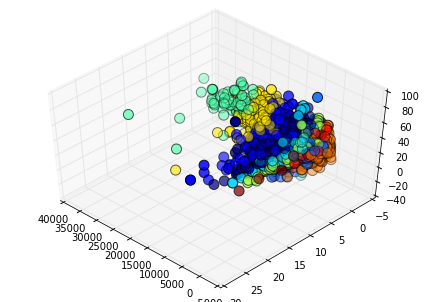

In [41]:
import matplotlib.pylab as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
f, axarr = plt.subplots(1,1)
axarr = Axes3D(f, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
labels = model.labels_
axarr.scatter(train_df['price'],train_df['room_floor'],train_df['room_size'] , c=labels.astype(np.float), s=100, cmap=mpl.cm.jet)
plt.show()

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(clusteringf, 'ward')

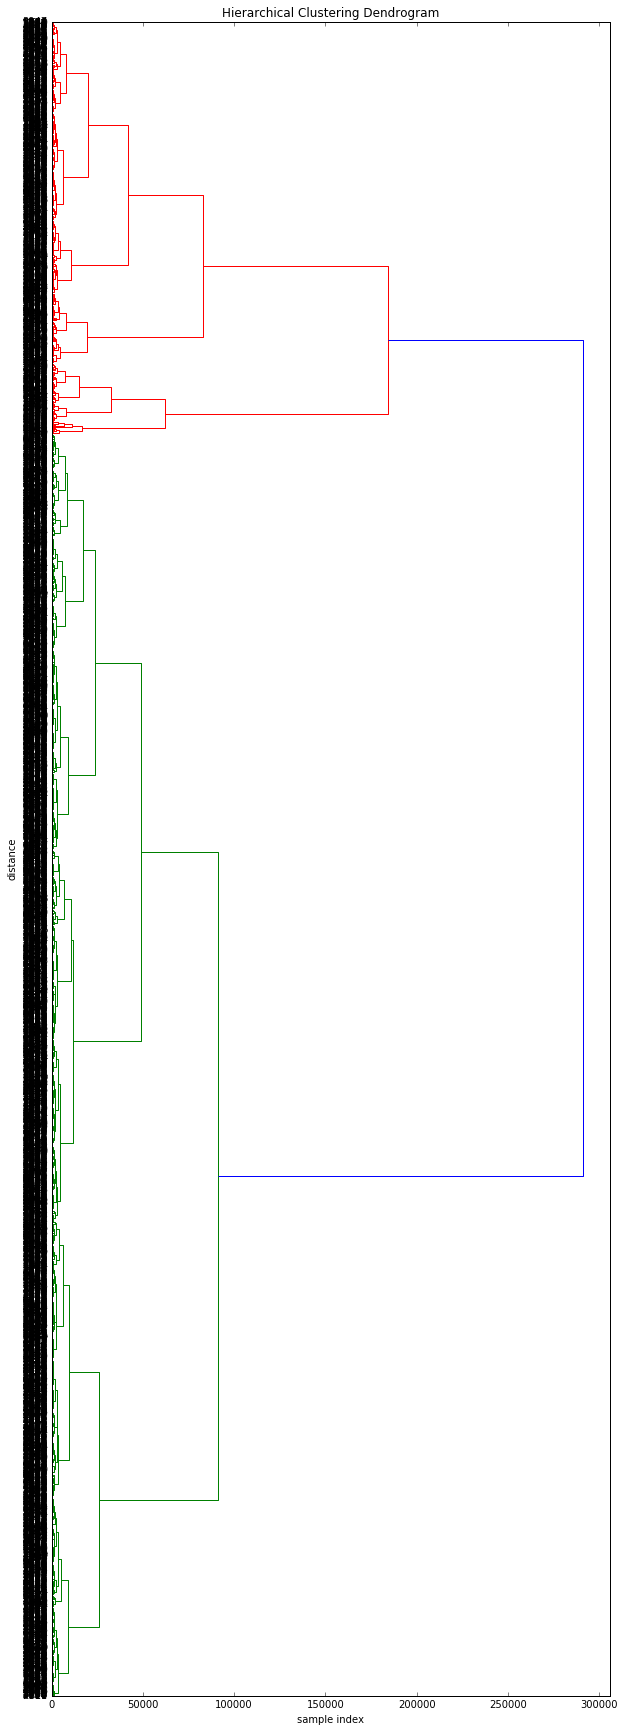

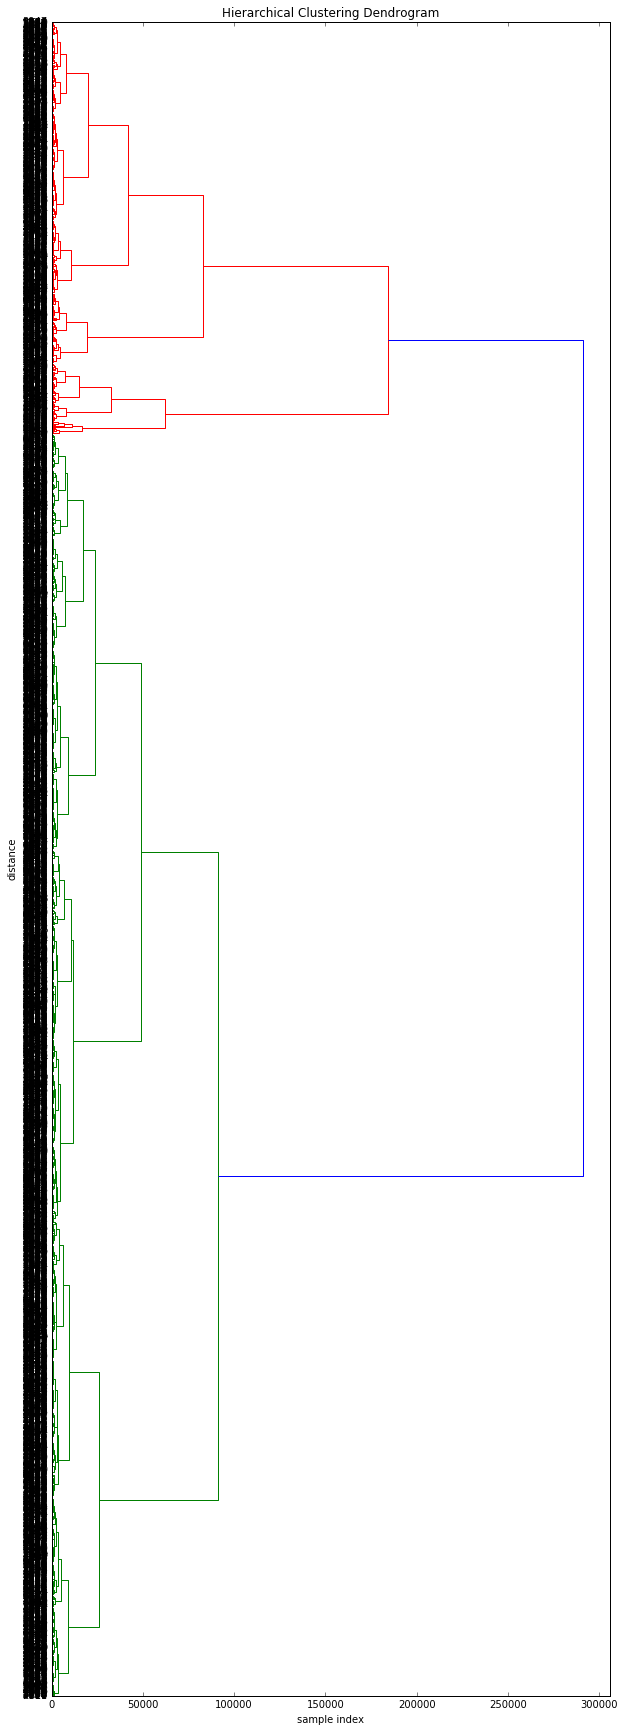

In [10]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,30))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z, #3, "level", show_leaf_counts=False,
    leaf_font_size=10,  # font size for the x axis labels
    orientation='left'
);
plt.show()